## Import Libraries

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Define the RNN class

In [28]:
class TimeSeriesRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size) -> None:
        super(TimeSeriesRNN, self).__init__()

        self.hidden_size=hidden_size

        self.rnn= nn.RNN(input_size, hidden_size, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        rnn_output, hidden = self.rnn(x, hidden)

        rnn_output = rnn_output.view(-1, self.hidden_size)

        rnn_output = self.fc(rnn_output)

        return rnn_output, hidden

## Define input data

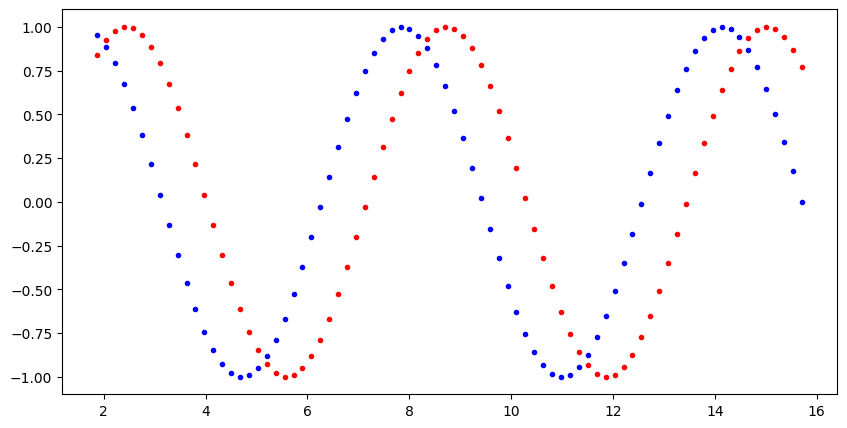

In [45]:
seq_length=80
time_lag=5
timeseries = np.linspace(1, 5*np.pi, seq_length+time_lag)
data = np.sin(timeseries)
data.resize((seq_length+time_lag, 1))

x= data[:-time_lag]
y=data[time_lag:]

plt.figure(figsize=(10,5))
plt.plot(timeseries[time_lag:], x, 'r.', label='input data')
plt.plot(timeseries[time_lag:], y, 'b.', label='input data')

plt.show()

### Pass data through RNN and inspect how it behaves

In [37]:
data = np.sin(np.linspace(0, 4*np.pi, seq_length))
data.resize((seq_length, 1))
data_input = torch.Tensor(data).unsqueeze(0)
test_rnn = TimeSeriesRNN(1,seq_length, 2, 1)

out, h_n = test_rnn(data_input, None)

print(f'Input Size ${data_input.size()}')
print(f'Output Size ${out.size()}')
print(f'Hidden Size ${h_n.size()}')

Input Size $torch.Size([1, 80, 1])
Output Size $torch.Size([80, 1])
Hidden Size $torch.Size([2, 1, 80])


## Train Model

### Define Network

In [39]:
input_size=1
output_size=1
hidden_dim=80
n_layer=1

rnn = TimeSeriesRNN(1, hidden_dim, output_size, n_layer)
rnn

TimeSeriesRNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

### Defie Loss and Optimizer

In [41]:
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(rnn.parameters(), lr=0.01)

In [48]:
def train(rnn, epochs, print_every):
    hidden=None
    for batch_i, step in enumerate(range(epochs)):
        # Generate input data
        timeseries = np.linspace(step*np.pi, (step+4)*np.pi, seq_length+time_lag)
        data = np.sin(timeseries)
        data.resize((seq_length+time_lag, 1))

        x= data[:-time_lag]
        y=data[time_lag:]

        x_tensor= torch.Tensor(x).unsqueeze(0)
        y_tensor=torch.Tensor(y)

        prediction, hidden = rnn(x_tensor, hidden)
        hidden = hidden.data


        loss = criterion(prediction, y_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_i % print_every==0:
                print(f'Loss ${loss.item()}')
                plt.plot(timeseries[time_lag:], x, 'r.')
                plt.plot(timeseries[time_lag:], prediction.data.numpy().flatten(), 'b.')
                plt.show()
    return rnn

Loss $0.052398551255464554


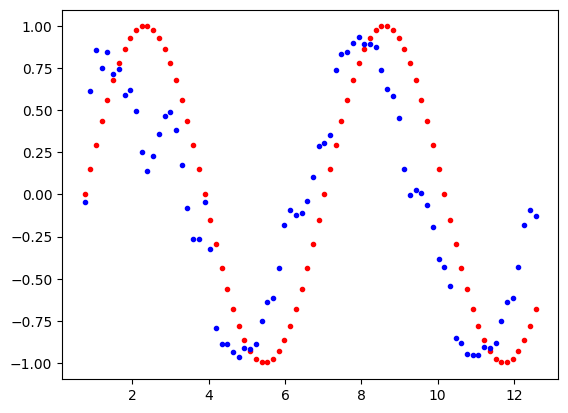

Loss $0.04760957509279251


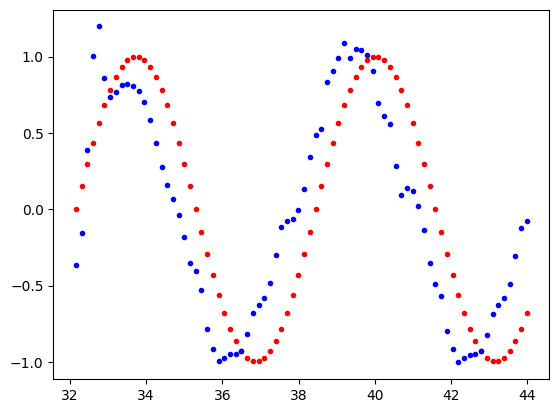

Loss $0.04060640186071396


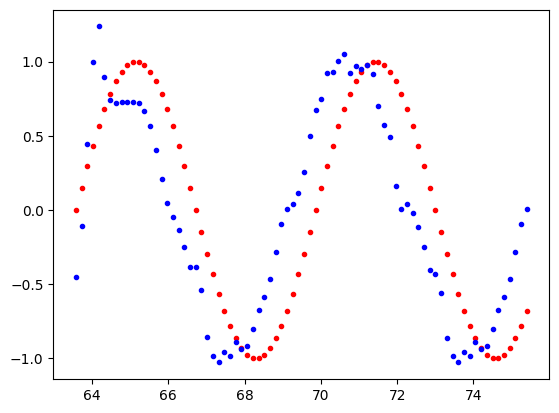

Loss $0.03667791932821274


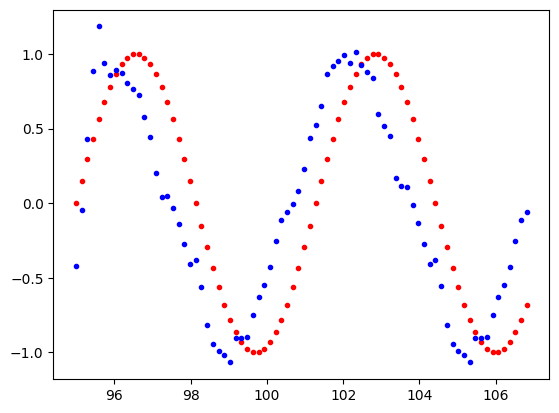

Loss $0.038652945309877396


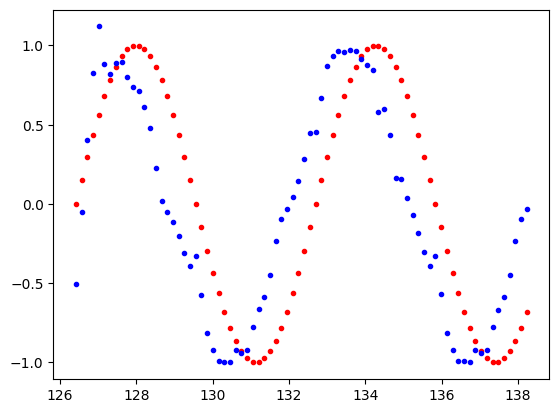

Loss $0.03922494873404503


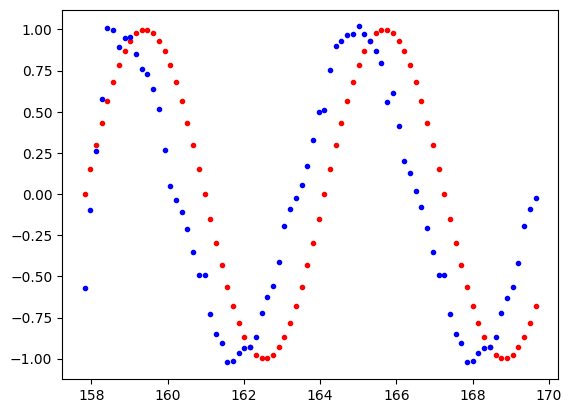

Loss $0.03661798685789108


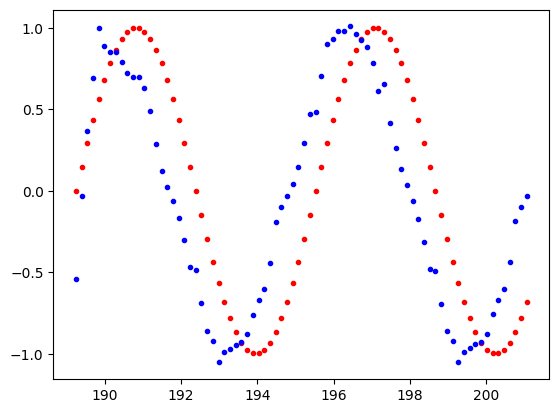

Loss $0.10764507949352264


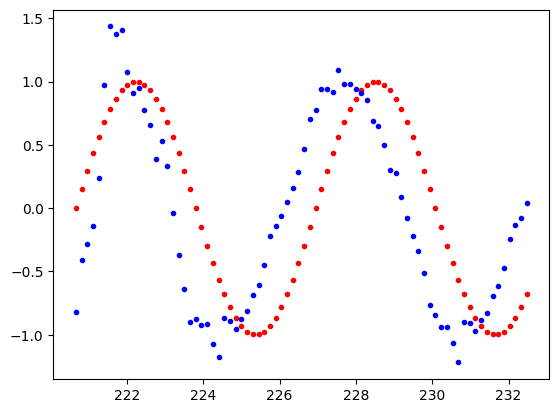

TimeSeriesRNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [54]:
train(rnn, 80, 10)